## Week 8 Homework

---

### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

#### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*

----------
We have the standard linear regression model:
$$
p(\mathbf{y} \mid \mathbf{X}, \boldsymbol{\beta}, \Sigma) \propto \exp \left(-\frac{1}{2}(\mathbf{y}-\mathbf{X} \boldsymbol{\beta})^{\top} \Sigma^{-1}(\mathbf{y}-\mathbf{X} \boldsymbol{\beta})\right)
$$

where $\Sigma=\sigma^2 I$, meaning the errors are i.i.d. normal with variance $\sigma^2$.
The prior on $\boldsymbol{\beta}$ follows a multivariate normal:

$$
p(\boldsymbol{\beta})=\mathcal{M} \mathcal{V} \mathcal{N}\left(\boldsymbol{\beta}_0, \Sigma_\beta\right)
$$

the prior density is: 
$$
p(\boldsymbol{\beta}) \propto \exp \left(-\frac{1}{2}\left(\boldsymbol{\beta}-\boldsymbol{\beta}_0\right)^{\top} \Sigma_\beta^{-1}\left(\boldsymbol{\beta}-\boldsymbol{\beta}_0\right)\right)
$$

### **1. Posterior Distribution of** $\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \Sigma$

Using Bayes' theorem, the posterior is:

$$
p(\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2) \propto p(\mathbf{y} \mid \boldsymbol{\beta}, \mathbf{X}, \sigma^2) p(\boldsymbol{\beta})
$$

Substituting the likelihood and prior:

$$
p(\mathbf{y} \mid \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \propto \exp \left(-\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

$$
p(\boldsymbol{\beta}) \propto \exp \left(-\frac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \Sigma_{\beta}^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) \right)
$$

Combining the exponent terms:

$$
-\frac{1}{2} \left[ \frac{1}{\sigma^2} (\boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} - 2 \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{y}) + \boldsymbol{\beta}^\top \Sigma_{\beta}^{-1} \boldsymbol{\beta} - 2 \boldsymbol{\beta}^\top \Sigma_{\beta}^{-1} \boldsymbol{\beta}_0 \right]
$$

Identifying the posterior mean and covariance:

$$
\Sigma_{\beta \mid y} = \left( \mathbf{X}^\top \mathbf{X} / \sigma^2 + \Sigma_{\beta}^{-1} \right)^{-1}
$$

$$
\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2 \sim \mathcal{MVN} \left( \mu_{\beta \mid y}, \Sigma_{\beta \mid y} \right)
$$

where:

$$
\mu_{\beta \mid y} = \Sigma_{\beta \mid y} \left( \mathbf{X}^\top \mathbf{y} / \sigma^2 + \Sigma_{\beta}^{-1} \boldsymbol{\beta}_0 \right).
$$

------------

### **2. Posterior Distribution of** $\sigma^2 \mid \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}$

The likelihood:

$$
p(\mathbf{y} \mid \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \propto (\sigma^2)^{-n/2} \exp \left(-\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

Assuming an inverse-gamma prior:

$$
p(\sigma^2) = \text{Inv-Gamma}(\alpha^*, \beta^*)
$$

Applying Bayes' theorem:


$$
p\left(\sigma^2 \mid \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}\right) \propto p\left(\mathbf{y} \mid \mathbf{X}, \boldsymbol{\beta}, \sigma^2\right) p\left(\sigma^2\right)
$$


Substituting the likelihood and prior:


$$
p(\sigma^2 \mid \mathbf{y}, \mathbf{X}) \propto (\sigma^2)^{-n/2} \exp \left(-\frac{1}{2\sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right) (\sigma^2)^{-\alpha^* - 1} \exp \left(-\frac{\beta^*}{\sigma^2} \right)
$$

Simplifying:

$$
p(\sigma^2 \mid \mathbf{y}, \mathbf{X}) \propto (\sigma^2)^{-(\alpha^* + n/2 + 1)} \exp \left(-\frac{\beta^* + \frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})}{\sigma^2} \right)
$$

Thus:

$$
\sigma^2 \mid \mathbf{y}, \mathbf{X} \sim \text{Inv-Gamma} \left(\alpha^* + \frac{n}{2}, \beta^* + \frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)
$$

---


### Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma` 
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
data = pd.read_csv(url)

# Display the first few rows
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Define predictor variables and target variable
X = data.drop(columns=['medv']).values  # Exclude the target variable
y = data['medv'].values  # Target variable: Median value of owner-occupied homes in $1000's

# Standardize the predictor variables
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standardized = (X - X_mean) / X_std

# Add an intercept term to the predictors
X_standardized = np.hstack([np.ones((X_standardized.shape[0], 1)), X_standardized])


In [4]:
# Number of predictors
n_predictors = X_standardized.shape[1]

# Define the model
with pm.Model() as model:
    # Priors for regression coefficients
    betas = pm.Normal('betas', mu=0, sigma=1, shape=n_predictors)
    
    # Prior for error standard deviation
    sigma = pm.HalfNormal('sigma', sigma=10)
    
    # Expected value of outcome
    mu = pm.math.dot(X_standardized, betas)
    
    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)

    # Sample from the posterior
with model:
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],21.512,0.223,21.087,21.926,0.002,0.001,12088.0,6005.0,1.0
betas[1],-0.797,0.273,-1.305,-0.288,0.003,0.002,11412.0,6234.0,1.0
betas[2],0.835,0.307,0.257,1.418,0.003,0.002,10724.0,6503.0,1.0
betas[3],-0.186,0.382,-0.875,0.559,0.004,0.004,10669.0,6079.0,1.0
betas[4],0.728,0.220,0.320,1.140,0.002,0.001,14693.0,6121.0,1.0
betas[5],-1.561,0.407,-2.319,-0.785,0.004,0.003,11251.0,5720.0,1.0
betas[6],2.790,0.279,2.288,3.331,0.003,0.002,9469.0,5741.0,1.0
betas[7],-0.080,0.344,-0.742,0.557,0.003,0.004,10440.0,5615.0,1.0
betas[8],-2.577,0.395,-3.344,-1.867,0.004,0.003,10988.0,6087.0,1.0
betas[9],1.626,0.475,0.714,2.507,0.005,0.004,7904.0,5410.0,1.0


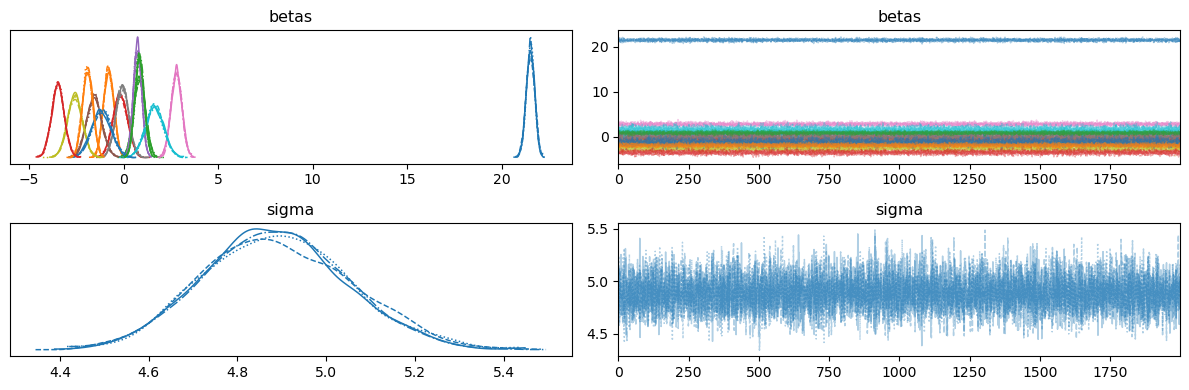

In [5]:
# Summary of the posterior
display(az.summary(trace))

# Trace plots
az.plot_trace(trace)
plt.tight_layout()

### Q3: perform robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$. 

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers" 
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q3 Extra: measurement error models?

What if $\textbf{x}_i = \textbf{x}_i^{true} + \eta_i, \eta_i \sim \mathcal{MVN}(\textbf{0}, \Sigma)$ for some kind of measurement error covariance structure $\Sigma$ and $\mathcal N (y_i| \textbf{X}^{true}\boldsymbol \beta, \sigma)$?





Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, nu, tau, tau_i]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.


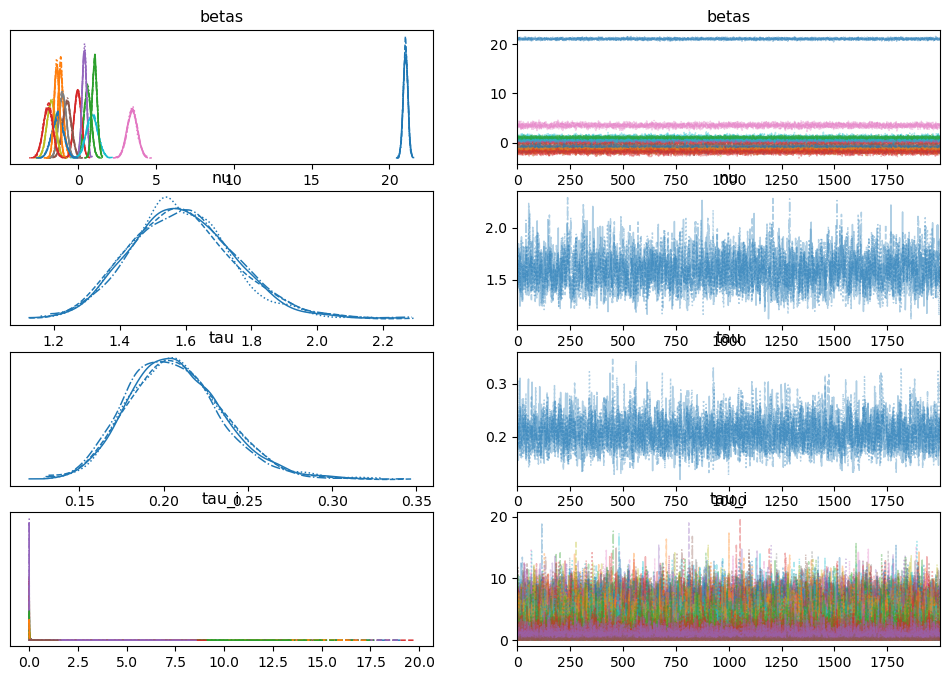

In [6]:
# Introduce outliers in the dataset by modifying some values
np.random.seed(42)
num_outliers = 5
outlier_indices = np.random.choice(data.index, size=num_outliers, replace=False)
data.loc[outlier_indices, "medv"] *= 5  # Inflate some house prices to create outliers

# Define predictor variables and target variable
X = data.drop(columns=['medv']).values  # Exclude the target variable
y = data['medv'].values  # Target variable: Median value of owner-occupied homes in $1000's

# Standardize the predictor variables
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standardized = (X - X_mean) / X_std

# Add an intercept term to the predictors
X_standardized = np.hstack([np.ones((X_standardized.shape[0], 1)), X_standardized])

# Number of predictors
n, p = X_standardized.shape

# Define Robust Bayesian Linear Regression Model using Student-T likelihood
with pm.Model() as robust_model:
    # Priors for regression coefficients
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)

    # Robust model: Student-T priors for variance components
    nu = pm.Gamma('nu', alpha=2, beta=0.1)  # Heavy-tailed distribution for robustness
    tau = pm.Gamma('tau', alpha=1, beta=1)
    
    # Latent observation precision (tau_i for each data point)
    tau_i = pm.Gamma('tau_i', alpha=nu/2, beta=nu/2, shape=n)
    
    # Expected value of outcome
    mu = pm.math.dot(X_standardized, betas)
    
    # Likelihood with precision tau * tau_i
    y_obs = pm.Normal('y_obs', mu=mu, tau=tau * tau_i, observed=y)

    # Sample from posterior
    trace_robust = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)

# Visualize trace plots for MCMC diagnostics
az.plot_trace(trace_robust)
plt.show()


# Identify potential outliers based on tau_i (precision for each data point)
tau_i_post = trace_robust.posterior['tau_i'].mean(dim=["chain", "draw"]).values



